In [1]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
#!pip install shap
#!pip install imbalanced_learn

In [2]:
#!pip install "numpy<=2.1" --force-reinstall

print("Numpy version:", np.__version__)

Numpy version: 2.1.0


In [3]:
file_path = "particle_data.csv"
df = pd.read_csv(file_path)

display(df)

,source,DOI,Authors,Year,Species,Life Stage,In vitro/in vivo,Sex,Experiment Type,Exposure Route,...,Sodium Azide Present?,Screened for Chemical Contamination?,Particle Cleaning?,Solvent Rinse,Background Contamination Monitored?,Concentration Validated?,Particle Behavior,Uptake Validated?,Tissue Distribution,Organisms Fed?
0,search,10.1007/s12013-015-0705-6,Barshtein,2016,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,No,NaN,NaN
1,search,10.1007/s12013-015-0705-6,Barshtein,2016,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,No,NaN,NaN
2,search,10.1007/s12013-015-0705-6,Barshtein,2016,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,No,NaN,NaN
3,search,10.1007/s12013-015-0705-6,Barshtein,2016,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,No,NaN,NaN
4,search,10.1007/s12013-015-0705-6,Barshtein,2016,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,workshop,10.1016/j.jhazmat.2020.123933,Li,2021,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,Yes,liver,Y
1104,workshop,10.1016/j.jhazmat.2020.123933,Li,2021,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,Yes,liver,Y
1105,workshop,10.1016/j.jhazmat.2020.123933,Li,2021,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,Yes,liver,Y
1106,workshop,10.1016/j.jhazmat.2020.123933,Li,2021,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,Yes,liver,Y


In [4]:
df["Exposure Media"].unique()

array(['phosphate buffer saline', 'culture medium DMEM', 'LHC-9 medium',
       'culture medium DMEMF12', 'culture media', 'blood', 'serum',
       'RPMI 1610 medium', 'culture medium',
       'dulbecco modified eagle medium', 'DMEM high glucose',
       'endothelial medium', 'HamsF12', 'MEM',
       'dulbecco modified eagle medium F-12', 'EBM2', 'DMEM', 'DMEM egf',
       'DMEM medium', 'human serum', 'pig serum',
       'eagles minimal essential medium', 'culture medium 106',
       'dulbecco modified eagle media', 'phenol red free medium',
       'eagles minimum essential medium', 'bronchoalveolar lavage fluid',
       'minimum essential media', 'bronchial epithelial growth medium',
       'MCDB131 medium', 'eagle minimal essential medium',
       'roswell park memorial institute serum-free medium',
       'serum-free culture medium',
       'roswell park memorial institute 1640 medium', 'rpmi1640 medium'],
      dtype=object)

In [5]:
df["Direction"].unique()

array(['Increase', nan, 'Decrease', 'Na'], dtype=object)

In [6]:
df["Zeta Potential (mV)"].unique()

array([   nan,  -9.8 , -26.8 , -36.  ,  54.  , -58.2 , -36.1 , -23.6 ,
         3.7 ,   4.2 , -23.7 ,   5.6 , -21.9 , -36.05, -44.55, -36.25,
       -19.73, -17.07, -11.5 ,  16.05, -37.57, -37.07])

In [7]:
df["Density (g/cm^3)"].unique()

array([1.07 , 1.34 , 0.875, 1.09 , 1.14 ,   nan, 1.15 , 1.19 , 0.95 ,
       0.935, 1.05 ])

In [8]:
df.columns.unique()

Index(['source', 'DOI', 'Authors', 'Year', 'Species', 'Life Stage',
       'In vitro/in vivo', 'Sex', 'Experiment Type', 'Exposure Route',
       'Particle Mix?', 'Negative Control', 'Reference Particle',
       'Exposure Media', 'Solvent', 'Detergent', 'pH', 'Salinity (ppt)',
       'Temperature (Avg)', 'Temperature (Min)', 'Temperature (Max)',
       'Exposure Duration (days)', 'Number of Doses', 'Replicates',
       'Sample Size', 'Dosing Frequency', 'Nominal Chemical Added',
       'Nominal Chemical Added Dose', 'Nominal Chemical Added Dose Units',
       'Measured Chemical Added', 'Measured Chemical Added Dose',
       'Measured Chemical Added Dose Units', 'Selected Dose', 'Effect',
       'Direction', 'Broad Endpoint Category', 'Specific Endpoint Category',
       'Endpoint', 'Level of Biological Organization',
       'Target Organelle, Cell, or Tissue', 'Polymer', 'Shape',
       'Density (g/cm^3)', 'Density, reported or estimated', 'Charge',
       'Zeta Potential (mV)', 'Zeta 

In [9]:
# proportion_df = pd.DataFrame({"Target Organelle, Cell, or Tissue":" ", "Effect Proportion": " "})
# for cell in df["Target Organelle, Cell, or Tissue"]:
#     if cell not in proportion_df["Target Organelle, Cell, or Tissue"].values:
#         new_row = {"Target Organelle, Cell, or Tissue": cell, "Effect_proportion": 1}
#         proportion_df = pd.concat([proportion_df, pd.DataFrame([new_row])], ignore_index=True)
#     else:
#         # increment the count for the existing endpoint
#         proportion_df.loc[proportion_df["Endpoint"] == cell, "Effect_proportion"] += 1

In [10]:
df["Endpoint"].unique()

array(['Cell Aggregate Size', 'Cell Aggregation (Small)', 'Cell Adhesion',
       'Micronuclei Frequency', 'hsp70 mRNA expression',
       'IL1b mRNA expression', 'Cytotoxicity', 'IL8 mRNA expression',
       'DNA damage', 'gstp1 mRNA expression', 'ho1 mRNA expression',
       'Mitochondrial Membrane Potential', 'Mitochondria ROS Production',
       'Reactive Oxygen Species Production', 'sod2 mRNA expression',
       'zo1 protein expression', 'Transepithelial Electric Resistance',
       'aat protein expression', 'IL6 protein expression',
       'IL8 protein expression', 'ho1 protein expression',
       'Lyosomal Protonation', 'CD163 protein expression',
       'CD200R protein expression', 'CD86 protein expression',
       'IL10 Release', 'IL1b Release', 'ATP Concentration', 'NADH Levels',
       'nos2 protein expression', 'Phagocytosis',
       'Immune Cell Proliferation', 'Immune Cell Protein Concentration',
       'tgfb1 Release', 'TNFa Release', 'Number of Mitochondria',
       'CD

# Needed Columns for Exposure Prediction
### 'Endpoint' = Precise variable being measured or outcome being tracked
### 'Shape' = Shape of polymer used for that experiment 
### 'Polymer' =  Polymer type for that experiment
### 'Selected Dose' = Dosage of exposure for that experiment

# This will be the target column for predictors to guess about
### 'Effect' = Does the exposure have an effect on the targeted endpoint/organelle 
### Even guess the chance percentage of effect that each one has




In [11]:
target_columns = ['Shape', 'Polymer','Selected Dose', 'Effect']
ndf = df[target_columns]
# 'Selected Dose'

In [12]:
ndf = ndf.dropna()

In [13]:
# change effect to 1 (True) and 0 (False)
ndf["Effect"] = ndf["Effect"].map({"Yes": 1, "No": 0})

In [14]:
ndf["Shape"].unique()

array(['Sphere', 'Fragment', 'Not Reported'], dtype=object)

In [15]:
# dropping 'Not Reported' as it could interfere with model accuracy

ndf = ndf[ndf["Shape"] != "Not Reported"]

ndf["Shape"].unique()

array(['Sphere', 'Fragment'], dtype=object)

In [16]:
display(ndf)
ndf.value_counts()

,Shape,Polymer,Selected Dose,Effect
0,Sphere,Polystyrene,2.841316e+07,1
1,Sphere,Polystyrene,1.136527e+08,1
2,Sphere,Polystyrene,2.841316e+08,1
3,Sphere,Polystyrene,2.841316e+07,1
4,Sphere,Polystyrene,1.136527e+08,1
...,...,...,...,...
1084,Fragment,Polystyrene,1.728431e-01,0
1085,Fragment,Polystyrene,1.728431e+00,0
1086,Fragment,Polystyrene,1.728431e-02,1
1087,Fragment,Polystyrene,1.728431e-01,1


Shape   Polymer      Selected Dose  Effect
Sphere  Polystyrene  2.705801e-12   0         19
                     1.021057e-11   1         19
                     6.485602e-11   0         18
                     8.896949e-09   0         18
                     3.144490e-08   0         18
                                              ..
                     4.493170e+08   0          1
                     1.797268e+08   1          1
                     8.986341e+08   0          1
                                    1          1
                     1.429021e+09   0          1
Name: count, Length: 201, dtype: int64

In [17]:
ndf.Polymer.unique()

array(['Polystyrene', 'Polypropylene', 'Polyamide', 'Polyethylene'],
      dtype=object)

In [18]:
ndf.Polymer.value_counts()

Polymer
Polystyrene      654
Polypropylene     45
Polyethylene      16
Polyamide          9
Name: count, dtype: int64

In [19]:
drop_values = ['Polyethylene','Polyamide','Polyurathane','Tire Rubber','Polyvinylchloride']
ndf = ndf[~ndf["Polymer"].isin(drop_values)]

ndf.Polymer.value_counts()

Polymer
Polystyrene      654
Polypropylene     45
Name: count, dtype: int64

### Sklearn ML Pipeline 

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np

tdf = ndf.copy()

X = tdf.drop(columns = ["Effect"])
y = tdf.pop("Effect")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
X_train.columns

Index(['Shape', 'Polymer', 'Selected Dose'], dtype='object')

In [22]:
display(X_train)

,Shape,Polymer,Selected Dose
590,Sphere,Polystyrene,8.859076e+04
1038,Fragment,Polystyrene,3.594596e-01
524,Sphere,Polystyrene,9.565808e+07
681,Sphere,Polystyrene,6.485602e-11
343,Sphere,Polystyrene,1.429021e+09
...,...,...,...
211,Sphere,Polystyrene,2.705801e-12
246,Sphere,Polystyrene,2.756854e-11
436,Fragment,Polypropylene,3.612786e+00
696,Sphere,Polystyrene,8.896949e-09


In [23]:
# count = 0
# for x in X_train["Selected Dose"]:
#     if x == "NaN":
#         count += 1
# count

In [24]:
from sklearn.preprocessing import FunctionTransformer

class NamedFunctionTransformer(FunctionTransformer):
    """
    FunctionTransformer that keeps track of feature names
    for compatibility with ColumnTransformer.get_feature_names_out().
    Makes for better organization.
    """
    def __init__(self, func=None, feature_names=None, **kwargs):
        super().__init__(func=func, **kwargs)
        self._feature_names = feature_names
        self.feature_names = feature_names

    def get_feature_names_out(self, input_features=None):
        # Return given names or fall back to input feature names
        if self._feature_names is not None:
            return np.array(self._feature_names)
        elif input_features is not None:
            return np.array(input_features)
        else:
            raise ValueError("No feature names provided.")



## Logistic Regression Pipeline

In [45]:
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.calibration import CalibratedClassifierCV


cat_transformer = OneHotEncoder(handle_unknown = "ignore", sparse_output = False)
cat_list = ["Shape", "Polymer"]
num_transformer = StandardScaler()


log_reg = LogisticRegression(penalty = 'l2', class_weight = 'balanced', solver = 'lbfgs', max_iter = 500)
calibrated_log_reg = CalibratedClassifierCV(
    estimator = log_reg,
    method = 'sigmoid',
    cv = 5
)


preprocessor = ColumnTransformer(
    transformers = [
        ("cat", cat_transformer, cat_list),
        ("num", num_transformer, ["Selected Dose"])
    ]
)

pipe = Pipeline(steps = [
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state = 42)),
    ("model", log_reg )
    ]
)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import shap

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)  

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       134
           1       0.70      0.39      0.50        76

    accuracy                           0.72       210
   macro avg       0.71      0.65      0.65       210
weighted avg       0.71      0.72      0.70       210

Confusion Matrix:
 [[121  13]
 [ 46  30]]


In [47]:
X_test_num = pipe.named_steps['preprocess'].transform(X_test)
X_train_num = pipe.named_steps['preprocess'].transform(X_train)
feature_names = pipe.named_steps['preprocess'].get_feature_names_out()
explainer = shap.Explainer(pipe.named_steps["model"], X_train_num)
shap_values = explainer(X_test_num)

display(shap_values.shape)

(210, 5)

In [48]:
print(feature_names)
print("X_train_num:", X_train_num.shape)
print("X_test_num:", X_test_num.shape)

['cat__Shape_Fragment' 'cat__Shape_Sphere' 'cat__Polymer_Polypropylene'
 'cat__Polymer_Polystyrene' 'num__Selected Dose']
X_train_num: (489, 5)
X_test_num: (210, 5)


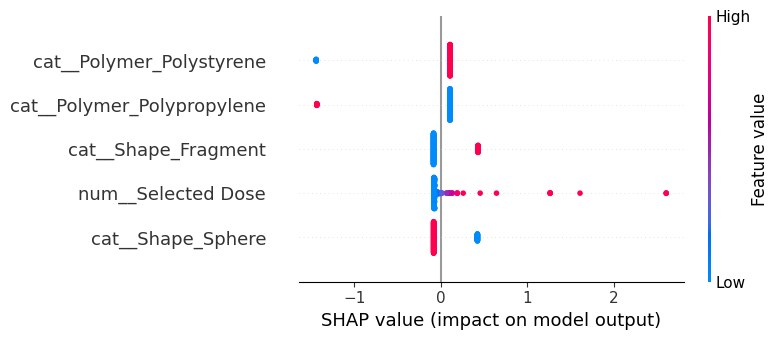

None


In [49]:

shap_summary_plot = shap.summary_plot(shap_values,
                                      X_test_num,
                                      feature_names = feature_names,
                                      show = True
                                     )

print(shap_summary_plot)


In [50]:
# MAKE A DATAFRAME WITH FOR ALL SHAP VALUES 
shap_df = pd.DataFrame(shap_values.values, columns = feature_names)
original_data = pd.DataFrame(shap_values.data, columns = feature_names)


display(original_data)
display(shap_df)

,cat__Shape_Fragment,cat__Shape_Sphere,cat__Polymer_Polypropylene,cat__Polymer_Polystyrene,num__Selected Dose
0,0.0,1.0,0.0,1.0,2.391030
1,0.0,1.0,0.0,1.0,-0.266738
2,0.0,1.0,0.0,1.0,-0.266738
3,0.0,1.0,0.0,1.0,0.264815
4,0.0,1.0,0.0,1.0,0.071993
...,...,...,...,...,...
205,0.0,1.0,0.0,1.0,-0.249033
206,1.0,0.0,0.0,1.0,-0.266738
207,0.0,1.0,0.0,1.0,-0.260659
208,0.0,1.0,0.0,1.0,-0.266070


,cat__Shape_Fragment,cat__Shape_Sphere,cat__Polymer_Polypropylene,cat__Polymer_Polystyrene,num__Selected Dose
0,-0.082245,-0.080942,0.10781,0.10838,1.265585
1,-0.082245,-0.080942,0.10781,0.10838,-0.077125
2,-0.082245,-0.080942,0.10781,0.10838,-0.077125
3,-0.082245,-0.080942,0.10781,0.10838,0.191417
4,-0.082245,-0.080942,0.10781,0.10838,0.094003
...,...,...,...,...,...
205,-0.082245,-0.080942,0.10781,0.10838,-0.068180
206,0.431786,0.424943,0.10781,0.10838,-0.077125
207,-0.082245,-0.080942,0.10781,0.10838,-0.074054
208,-0.082245,-0.080942,0.10781,0.10838,-0.076787


In [51]:
merged_df = shap_df.merge(original_data, how = "left", left_index = True, right_index = True)

In [52]:
display(merged_df)

,cat__Shape_Fragment_x,cat__Shape_Sphere_x,cat__Polymer_Polypropylene_x,cat__Polymer_Polystyrene_x,num__Selected Dose_x,cat__Shape_Fragment_y,cat__Shape_Sphere_y,cat__Polymer_Polypropylene_y,cat__Polymer_Polystyrene_y,num__Selected Dose_y
0,-0.082245,-0.080942,0.10781,0.10838,1.265585,0.0,1.0,0.0,1.0,2.391030
1,-0.082245,-0.080942,0.10781,0.10838,-0.077125,0.0,1.0,0.0,1.0,-0.266738
2,-0.082245,-0.080942,0.10781,0.10838,-0.077125,0.0,1.0,0.0,1.0,-0.266738
3,-0.082245,-0.080942,0.10781,0.10838,0.191417,0.0,1.0,0.0,1.0,0.264815
4,-0.082245,-0.080942,0.10781,0.10838,0.094003,0.0,1.0,0.0,1.0,0.071993
...,...,...,...,...,...,...,...,...,...,...
205,-0.082245,-0.080942,0.10781,0.10838,-0.068180,0.0,1.0,0.0,1.0,-0.249033
206,0.431786,0.424943,0.10781,0.10838,-0.077125,1.0,0.0,0.0,1.0,-0.266738
207,-0.082245,-0.080942,0.10781,0.10838,-0.074054,0.0,1.0,0.0,1.0,-0.260659
208,-0.082245,-0.080942,0.10781,0.10838,-0.076787,0.0,1.0,0.0,1.0,-0.266070


In [53]:
merged_df.columns.unique()

Index(['cat__Shape_Fragment_x', 'cat__Shape_Sphere_x',
       'cat__Polymer_Polypropylene_x', 'cat__Polymer_Polystyrene_x',
       'num__Selected Dose_x', 'cat__Shape_Fragment_y', 'cat__Shape_Sphere_y',
       'cat__Polymer_Polypropylene_y', 'cat__Polymer_Polystyrene_y',
       'num__Selected Dose_y'],
      dtype='object')

### Find the proportion of shap values to what data point was actually used by the model in prediction

In [54]:
# Shape Fragment
for shap, actual in zip(merged_df['cat__Shape_Fragment_x'], merged_df['cat__Shape_Fragment_y']):
    if actual == 1.0:
        print(shap)

0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001
0.431785649722001


In [55]:
# Shape Sphere
for shap, actual in zip(merged_df['cat__Shape_Sphere_x'], merged_df['cat__Shape_Sphere_y']):
    if actual == 1.0:
        print(shap)

-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.08094152833644919
-0.0809415283

In [56]:
# Polymer Polypropylene
for shap, actual in zip(merged_df['cat__Polymer_Polypropylene_x'], merged_df['cat__Polymer_Polypropylene_y']):
    if actual == 1.0:
        print(shap)

-1.4323348664531226
-1.4323348664531226
-1.4323348664531226
-1.4323348664531226
-1.4323348664531226
-1.4323348664531226
-1.4323348664531226
-1.4323348664531226
-1.4323348664531226
-1.4323348664531226
-1.4323348664531226
-1.4323348664531226


In [57]:
for shap, actual in zip(merged_df['cat__Polymer_Polystyrene_x'], merged_df['cat__Polymer_Polystyrene_y']):
    if actual == 1.0:
        print(shap)

0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421
0.10838037006804421


In [58]:
print(merged_df["cat__Shape_Fragment_x"].value_counts())

cat__Shape_Fragment_x
-0.082245    171
 0.431786     39
Name: count, dtype: int64


In [59]:
print(merged_df["cat__Shape_Sphere_x"].value_counts())

cat__Shape_Sphere_x
-0.080942    171
 0.424943     39
Name: count, dtype: int64


In [60]:
print(merged_df["cat__Polymer_Polypropylene_x"].value_counts())

cat__Polymer_Polypropylene_x
 0.107810    198
-1.432335     12
Name: count, dtype: int64


In [61]:
print(merged_df["cat__Polymer_Polystyrene_x"].value_counts())

cat__Polymer_Polystyrene_x
 0.108380    198
-1.439911     12
Name: count, dtype: int64


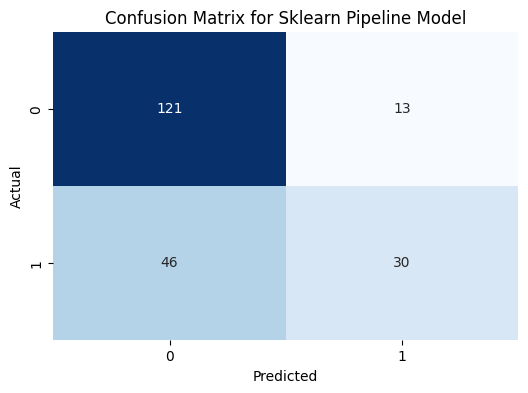

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (6,4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Sklearn Pipeline Model")
plt.show()